# Computational Social Science Project #3 

**Enter your Name:** Lara Pesce Ares

*Semester:* Fall 2025

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

#%pip install --upgrade pip
#%pip install xgboost
import xgboost as xgb
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

#%pip install pymc
#%pip install pymc_bart
import pymc as pm                  # PyMC (formerly PyMC3) is a Python package for Bayesian statistical modeling
import pymc_bart as pmb            # PyMC-BART extends PyMC 
import arviz as az 

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

Let's visualize what the distribution of results looks like.

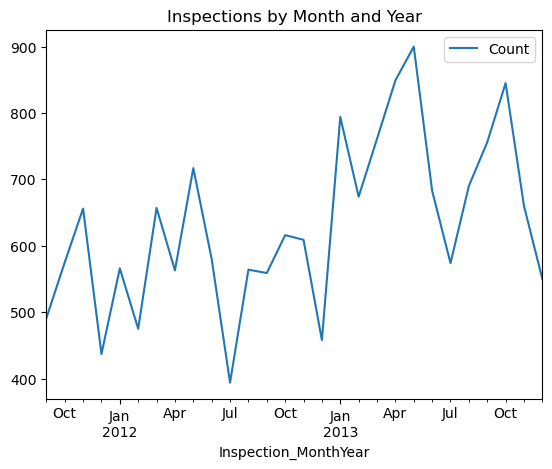

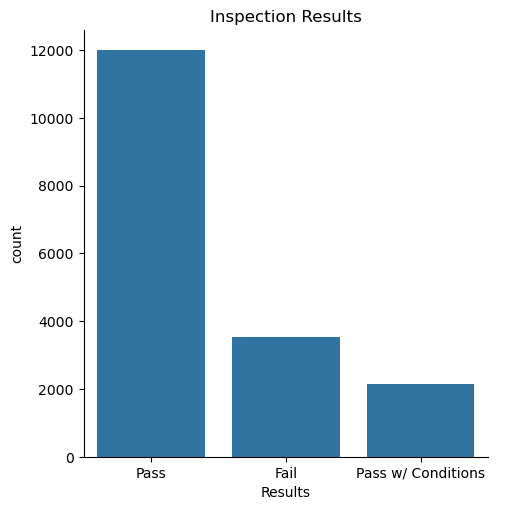

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

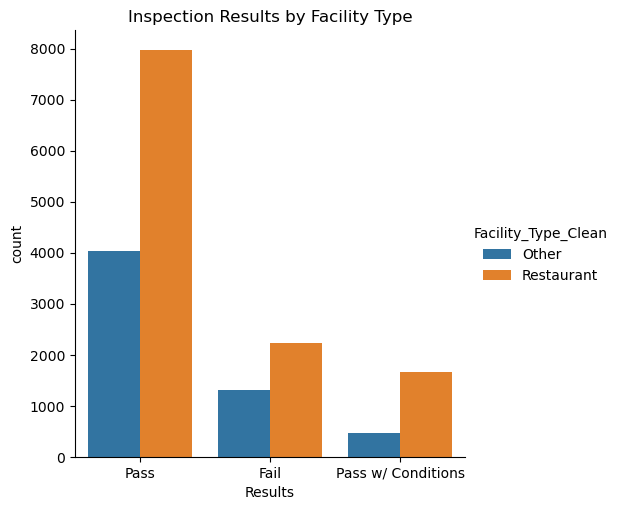

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
# Decided I do, so not commenting out
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])

# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

I am going to use k-fold cross-validation because it makes better use of the data and gives more reliable performance estimates than a single train/validation split. Since the pass/fail outcome is binary, keeping the class balance consistent across folds will make the model comparisons fairer.

### Model 1: Logistic Regression

Logistic regression models the probability that an inspection will pass or fail based on other observed factors. It uses a linear combination of predictors that is passed through a logistic (S-shaped) function to keep outputs between 0 and 1. It assumes that the relationship between each predictor and the odds of 0/failure is roughly linear, and that errors are independent. The main advantage is interpretability because the coefficients directly show the strength of the effect of individual variables on the failure odds. The main con is that it can lead you to miss complex interactions. Given all this I think it is a solid choice as a baseline model for comparison and eventual interpretation.

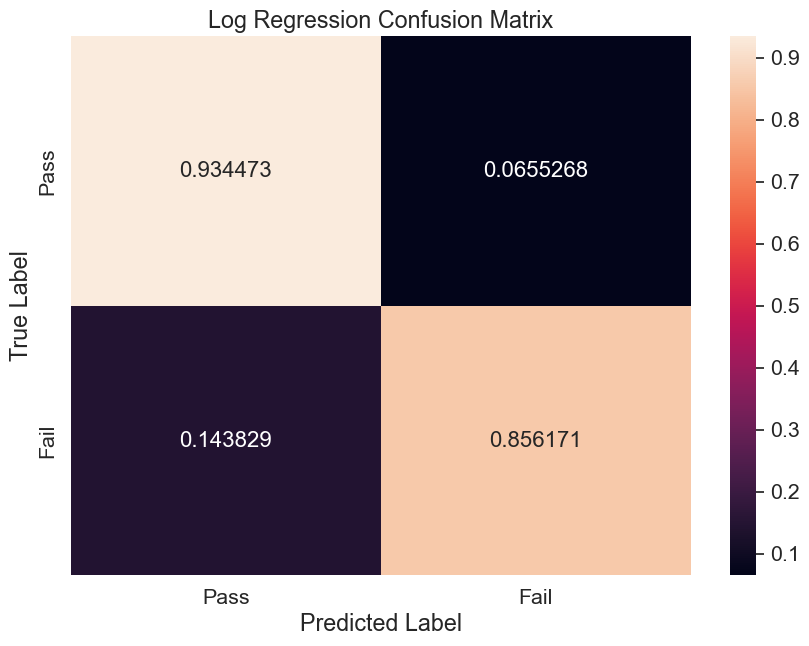

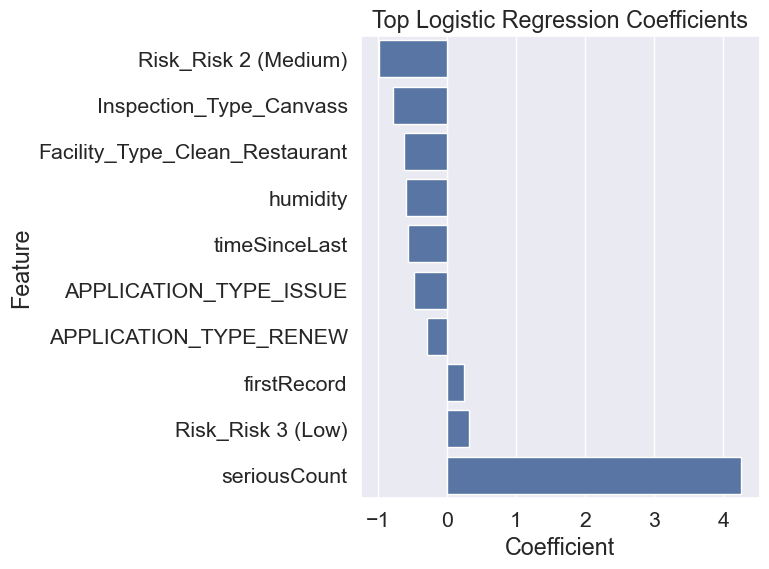

In [13]:
# create k-folds

# you can re-intialize and increase the max-iterations if we want increase the # of folds
log_reg = LogisticRegression(max_iter = 100)

# specify cross validation
log_pred = cross_val_predict(estimator = log_reg,       # specify object that is implementing fit 
                             X = X,                     # features
                             y = y,                     # target variable 
                             cv = 10)                    # how many folds


# specify confusion matrix
cf_matrix = confusion_matrix(y,                     # actual targets (ground truth)
                             log_pred,              # estimated targets 
                             normalize = "true")    # normalize confusion matrix over rows and columns 


# turn cf_matrix into a dataframe for plotting purposes
df_cm = pd.DataFrame(cf_matrix)


# label dataframe 
df_cm = df_cm.rename(index   = {0: "Pass", 1: "Fail"}, # label rows
                     columns = {0: "Pass", 1: "Fail"}) # label columns



# plot 
plt.figure(figsize = (10,7))                     # set figure size
sns.set(font_scale=1.4)                          # set label size

# specify heat map
sns.heatmap(df_cm,                               # specify dataframe                          
           annot=True,                           # display data values       
           annot_kws={"size": 16},               # format data values
           fmt='g')                              # format values as "general"      

# labels 
plt.title("Log Regression Confusion Matrix")                    # label title
plt.xlabel("Predicted Label")                    # label x axis
plt.ylabel("True Label")                         # label y axis     
plt.show()                                       # show label

# fit logistic regression on full data to get coefficients
log_reg.fit(X, y)

# extract the coefficients and create a dataframe for plotting 
logit_data = pd.concat(
    [
        pd.DataFrame(X.columns, columns=["Feature"]),
        pd.DataFrame(log_reg.coef_.T, columns=["Coefficient"])
    ],
    axis=1
)

# add absolute value for ranking
logit_data["abs_coef"] = logit_data["Coefficient"].abs()

# keep top 10 by absolute value of coefficient
top_coef = logit_data.nlargest(10, "abs_coef")

# sort so the smallest appears at the bottom of the plot
top_coef = top_coef.sort_values("Coefficient")

# plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_coef,
    x="Coefficient",
    y="Feature"
)
plt.title("Top Logistic Regression Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

###  Model 2: XGBoost

XGBoost is a high-performance boosting algorithm that builds many shallow decision trees sequentially in order to correct errors made by the other trees. The benefit is that it doesn’t rely on linear assumptions and can capture complicated relationships and interactions automatically. It also includes built-in regularization, which helps control overfitting, and it can handle missing data effectively. The cons are that it requires careful tuning and is less interpretable than a simple logistic regression model. For this food inspection prediction, it’s a good candidate because the inspection data appears to be noisy and nonlinear, and we want a model that is driving towards the most predictive rather than interpretability.

In [14]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=10,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.918
recall: 0.842
precision: 0.774
f1: 0.806


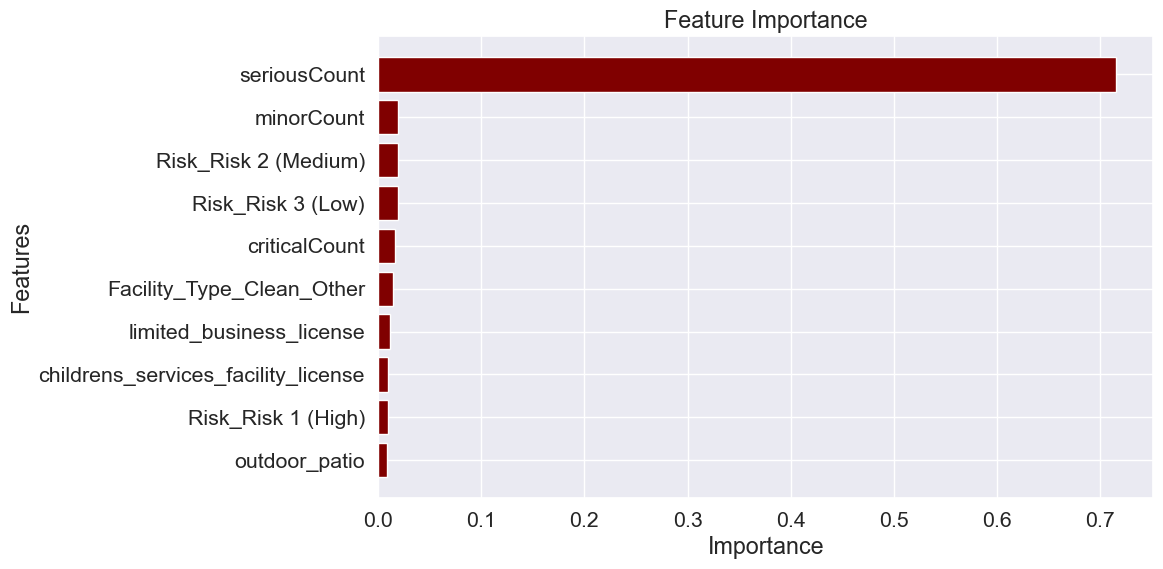

In [15]:
# Let's look at the feature importance
# ----------

# Initialize an array to hold the feature importances
importances = np.zeros(X.shape[1])

# Average the feature importances over the folds
for estimator in cv_results['estimator']:
    importances += estimator.feature_importances_
    
# Divide by the number of folds
importances /= 10

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'feature': X.columns, 
                                   'importance': importances})

# Sort the features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Take the top 10 features
feature_importance = feature_importance.head(10)

# Plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance['feature'], 
         feature_importance['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# gca stands for "get current axis", which allows you to modify the properties of the axes.
# and then inverts the y-axis, meaning that the values that were at the bottom will now be at the top, and vice versa.
plt.gca().invert_yaxis() 
plt.show()

### Model 3: BART

BART is an ensemble model that also uses many trees like XGBoost, but instead of optimizing them one by one, it takes a fully Bayesian approach by treating all the model parameters as random variables and estimating a posterior distribution over possible predictions. This means BART is better at providing uncertainty estimates, showing how confident it is about each prediction. The main drawback is computational cost and complexity. It’s a good fit for this problem because we want both accurate predictions and an idea of how uncertain those predictions are.

In [16]:
# set random seed
# ----------
# this is a slightly different but more efficient way to see a random seed bc you can call 
# the object "random_seed" later in the script but only change it once at the top of the script
random_seed = 300 
np.random.seed(random_seed)

# settings for ArviZ (which is specifically used to visualize Bayesian models)
az.style.use("arviz-darkgrid")

In [17]:
# Make sure X is (n_obs, n_features) and y is (n_obs,)
X_bart = np.asarray(X, dtype="float64")           # e.g. (15311, k)
y_bart = np.asarray(y, dtype="float64").ravel()   # (15311,)

In [19]:
# Fit BART Model
# ---------------------------------------------------------

# Create a new probabilistic model
with pm.Model() as model_coal: 

    
    # Step 1: fit the model and store the output
    # ----------
    μ_ = pmb.BART("μ_",             # store model output in "μ_" object
                  X=X_bart,         # setting predictor data
                  Y=y_bart,         # setting outcome (normalizing by taking the logarithm)
                  m=20)             # This parameter defines the number of trees to used to sum over
    
    # Step 2: exponentiate the stored outcome 
    # ----------
    # This line is defining a deterministic variable μ, which is the exponential of μ_. 
    # This is done because μ_ is on the log scale due to the np.log(y_data) used in the BART model.
    μ = pm.Deterministic("μ", 
                         pm.math.exp(μ_)) 

    # Step 3: compare model with Poisson to get predictions
    # ----------
    y_pred = pm.Poisson("y_pred",        # store model output in "y_pred" object
                        mu=μ,            # parameter for the Poisson distribution representing the mean
                        observed=y_bart) # observed data that the model is conditioned 
    
    # Step 4: sample the posterior distribution of the model
    # ----------
    # NOTE: default pm.sample() is extremely slow for BART on large datasets.
    # Reduce chains, draws, and tune so the model actually finishes in reasonable time.
    idata_coal = pm.sample(
        draws=200,        # number of retained posterior draws per chain
        tune=200,         # warmup / adaptation iterations
        chains=4,         # fewer chains to reduce total compute
        cores=4,          # match number of chains
        random_seed=random_seed
    )

Multiprocess sampling (4 chains in 4 jobs)
PGBART: [μ_]


Output()

Sampling 4 chains for 200 tune and 200 draw iterations (800 + 800 draws total) took 9 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [27]:
print(x_plot.shape)
print(rate_mean.shape)
print(rates.shape)

(15311,)
(15311,)
(4, 200, 15311)


In [26]:
# # Visualize fit
# # ---------------------------------------------------------
# # The underscore (_) is a common convention in Python for a variable name that we don't plan to use.

# # plot settings
# _, ax = plt.subplots(figsize=(10, 6)) 

# # sample posterior distribution and calcualte mean
# rates = idata_coal.posterior["μ"] / 4
# rate_mean = rates.mean(dim=["draw", "chain"])

# # plot specifications
# ax.plot(X_bart, rate_mean, "w", lw=3)
# ax.plot(X_bart, y_bart / 4, "k.")
# az.plot_hdi(X_bart, rates, smooth=False)
# az.plot_hdi(X_bart, rates, hdi_prob=0.5, smooth=False, plot_kwargs={"alpha": 0})
# ax.plot(coal, np.zeros_like(Inspection_MonthYear) - 0.5, "k|")
# ax.set_xlabel("Month Years")
# ax.set_ylabel("Chance of Failure");

# Visualize fit
# ---------------------------------------------------------
# The underscore (_) is a common convention in Python for a variable name that we don't plan to use.

# use Inspection_MonthYear as the x-axis for plotting
# convert to a NumPy array so shapes/dtypes are clean for Matplotlib / ArviZ
x_plot = np.asarray(Inspection_MonthYear)  # should be length n_obs and aligned with X_bart / y_bart

# plot settings
_, ax = plt.subplots(figsize=(10, 6)) 

# sample posterior distribution and calcualte mean
rates = idata_coal.posterior["μ"] / 4
rate_mean = rates.mean(dim=["draw", "chain"]).values  # convert xarray -> NumPy for plotting

# plot specifications
ax.plot(x_plot, rate_mean, "k", lw=2)          # posterior mean (use black so it's visible)
ax.plot(x_plot, y_bart / 4, "k.")              # observed data (scaled)
az.plot_hdi(x_plot, rates, smooth=False)       # outer HDI
az.plot_hdi(x_plot, rates, hdi_prob=0.5,       # inner HDI
            smooth=False, plot_kwargs={"alpha": 0})

# add vertical tick marks at each inspection month-year
# use a plain float array for y-values to avoid dtype issues with datetime-like x
ax.plot(x_plot, np.full(len(x_plot), -0.5), "k|")

ax.set_xlabel("Month Years")
ax.set_ylabel("Chance of Failure")

plt.show()


NameError: name 'Inspection_MonthYear' is not defined

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [14]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------


In [15]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------


In [16]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------


In [17]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [18]:
# data processing
# -----------

# process features
X_test2014 = chicago_inspections_2014[...]

# process target 
y_test2014 = chicago_inspections_2014[...]


KeyError: Ellipsis

In [ ]:
# predict and compare 
# -----------


In [ ]:
# evaluate
# -----------


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**YOUR ANSWER HERE**...

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...